# In-Class Exercise #3: Random Sampling

In this exercise, we will use a Jupyter notebook to explore discrete and direct continuous sampling. You can use these templates as a starting point. Some of the following steps have already been incorporated into the templates as denoted by a ✅. Study these portions of the files, and make your own additions where necessary. 

Download this file and submit it with your last name prepended to the filename.



## I. Set the Random Number Seed

In order to ensure reproducibility, initialize the seed of NumPy's random number generator. It is good practice to have a random seed that stays constant for testing your results.


In [26]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2342)  # <--- add this anywhere that you want to restart the 
                      #      random number sequence in a predictable way
                      #      note: you can choose any value

## II. Direct Discrete Sampling

### A. Load and Visualize PDF

In the template, create arrays with the data in the table below. This is a small data set representing the pets owned by 30 different people. The data contain five possibilities for pets (denoted by a "bin number" in column 1 of the table and labeled in column two in the table below) and their corresponding (unnormalized) probabilities. 

  | Bin | Pet | Frequency Distribution | Normalized PDF Value | CDF |
  |---|---|---|---|---|
  | 0   | Fish | 5 | 0.1666 | 0.1666 |
  | 1 | Cat | 4 | 0.1333 | 0.3 |
  | 2 | Dog | 12 | 0.4 | 0.7 |
  | 3 | Rabbit | 2 | 0.0666 | 0.07666 |
  | 4 | Bird | 7 | 0.2333 | 1.0 |


#### Activities

1. **Starting on paper**, normalize the PDF data and determine the CDF (i.e., fill in the empty columns in the table).
2. Next, implement these calculations in the Jupyter notebook template. 
3. Plot the PDF and CDF of this distribution ✅

In [27]:
# NO CHANGES NECESSARY
# establish frequency distribution
freq = np.array([5, 4, 12, 2, 7], dtype=float)
vals = np.array([0, 1, 2, 3, 4], dtype=int)
pets = ['fish', 'cat', 'dog', 'rabbit', 'bird']

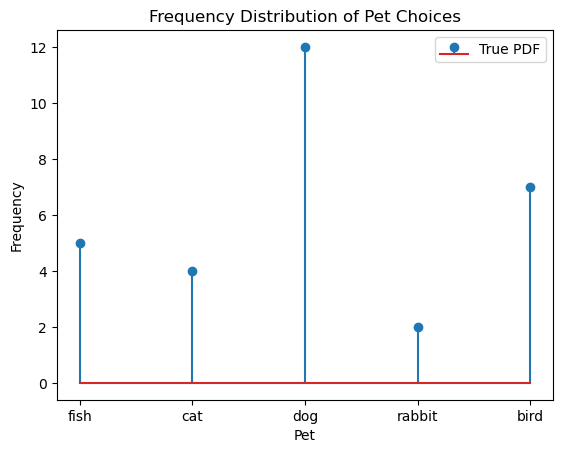

In [28]:
# NO CHANGES NECESSARY
# Plot the frequency distribution
plt.stem(pets, freq, label="True PDF")
plt.xlabel("Pet")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Pet Choices")
plt.legend()
plt.show()

In [29]:
# ACTIVITY: normalize the PDF and generate the CDF
pdf = freq / np.sum(freq)
cdf = np.cumsum(pdf)  # Note: cdf should have one more entry than the pdf

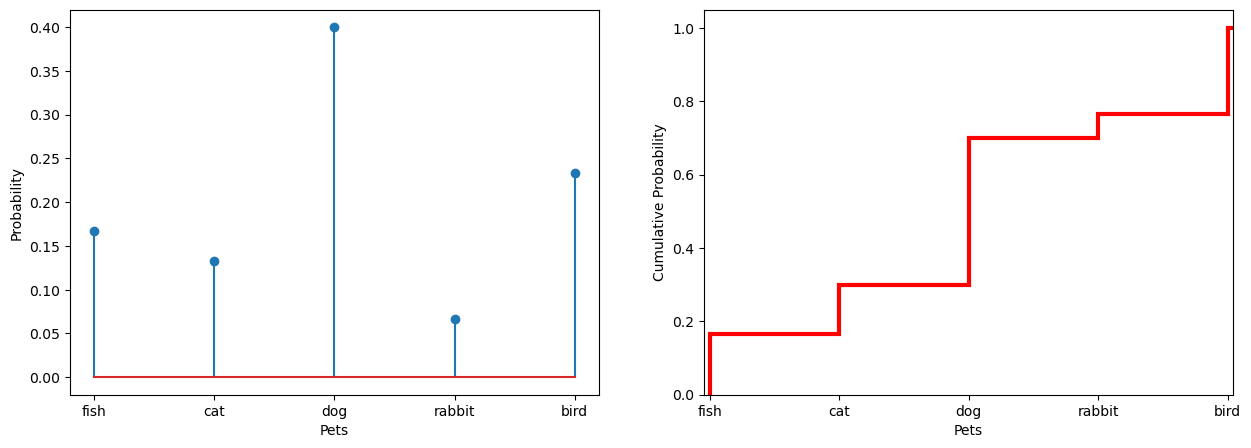

In [30]:
# NO CHANGES NECESSARY
plt.figure(1, figsize=(15,5))

# plot the PDF
plt.subplot(121)
plt.stem(pets, pdf)
plt.xlabel("Pets")
plt.ylabel("Probability")

# plot the CDF
plt.subplot(122)
plt.stairs(cdf, pets + [' '], color='red', lw=3 )
plt.xlim(-0.04,4.04)
plt.xlabel("Pets")
plt.ylabel("Cumulative Probability")
plt.show()

### B. Create Discrete Sampling Function

#### Activity

Write a function, `samplePDF`, to perform direct discrete sampling.  Your function will take three arguments:

  - a uniform random variable,
  - a vector representing the set of possible pets for the distribution being sampled,
  - a vector of probabilities for each of those pets,

and will return a single value:

* a sampled value (i.e., "bin number" corresponding to a particular pet) from the set of possibilities.

The beginning of `samplePDF` in the cell below provides some checks on the arguments. The second, commented, half of this function is left for you to complete.


1) determine the CDF (this should be identical to your solution in the previous part
2) return a "bin" value (Hint: see the while loop). 

In [31]:
# ACTIVITY: complete this function
def samplePDF(prn, vals, pdf):
    """
    Return a single sample from a discrete PDF
    
    inputs
    -------
    prn : a uniform random variable between (0,1)
    vals : a numpy array of values that are being selected
    pdf : a frequency distribution for the values in `vals`
    
    returns
    --------
    a single value from the list vals sampled according to the PDF
    """
    
    # some defensive programming to make sure the parameters are reasonable
    if prn < 0.0 or prn > 1.0:
        raise ValueError(f'Random variable {prn} is out of [0, 1) bounds')

    if len(vals) != len(pdf):
        raise ValueError(f'Length of values ({len(vals)}) and probabilities ({len(pdf)}) are not the same')

    if sum(pdf) != 1.0:
        print(f'Original PDF was not normalized and has been normalized')
        pdf /= sum(pdf)

    # calculate the CDF
    cdf = np.cumsum(pdf) # <-- fill this in

    # search for the sample in the PDF
    bin = 0
    while prn > cdf[bin]: # replace False with the correct expresion
        bin += 1

    return vals[bin]

In [32]:
# ACTIVITY: Run this cell multiple times to test that you get valid and varying results
# (You shouldn't need to change anything here)
for run in range(5):
    prn = np.random.rand()
    bin = samplePDF(prn, vals, pdf)
    print(f'random variable {prn} results in value of {bin} or {pets[bin]}')

random variable 0.3527652003547589 results in value of 2 or dog
random variable 0.24368066071005645 results in value of 1 or cat
random variable 0.6638693780556815 results in value of 2 or dog
random variable 0.4277614545304156 results in value of 2 or dog
random variable 0.4021144953991911 results in value of 2 or dog


### C. Test Discrete Sampling Function

#### Activity 

Use your function, `samplePDF` to sample the PDF and
plot a histogram of the results. ✅  

Do this for 10 samples, 10,000 samples, and 1,000,000 samples. 

Some convenience functions have been provided below to help with plotting.

Note that code is included in these functions to plot the true PDF from the table above and the sampled data on the same plot.


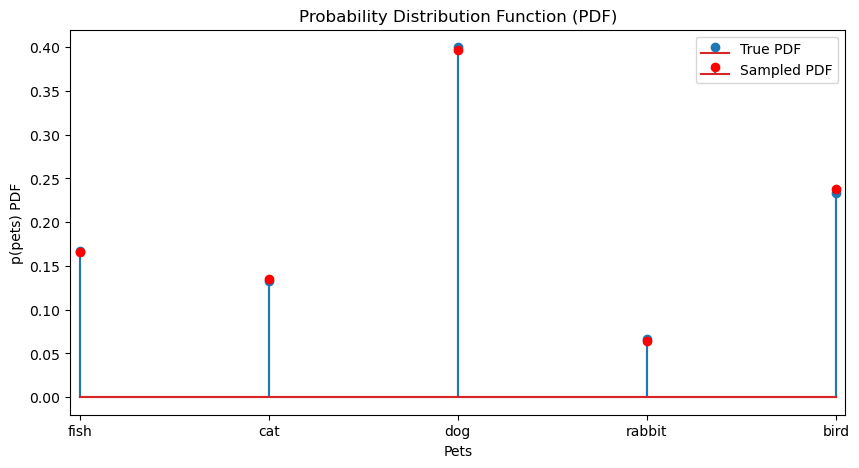

In [33]:
# plot the CDF using the "stairs" plot type
plt.figure(figsize=(10,5))

# plot the PDF from the original PDF using the "stem" plot type
plt.stem(pets, pdf, label='True PDF') # <-- complete this line

# generate and store some samples of the PDF
num_samples = 10000
results = np.array([samplePDF(prn, vals, pdf) for prn in np.random.rand(num_samples)])

# bin those samples into a histogram with the same number of bins
# as the original PDF
hist, _ = np.histogram(results,len(pets)) # <-- fill this in

# add a stem plot of the sampled data
plt.stem(pets, hist/num_samples, label='Sampled PDF', markerfmt='ro') # <-- complete this line

# formatting
plt.title('Probability Distribution Function (PDF)')
plt.xlabel('Pets')
plt.ylabel('p(pets) PDF')
plt.xlim([-0.05, 4.05])
plt.legend()
plt.show()


## III. Direct Continuous Sampling

We will now sample the scattering conditions of a particle undergoing a collision with the following (fictional) scattering laws:

- $f(\mu) = \mu^{2}$  for 0 ≤ $\mu$ < 1, where μ is the cosine of the scattering angle
- $f(\epsilon) = \large{\frac{1-\epsilon}{2-\mu}}$ for  0 < $\epsilon$ < 1, where ε is the ratio of the exit energy to the incoming energy

### A. Pre-coding Preparation


#### Scattering angle:

- What is the normalized PDF for the scattering angle cosine, μ?

**ANSWER:** $p(\mu) = 3\mu^2$

- What is the CDF for the scattering angle cosine, μ?

**ANSWER:** $P(\mu) = \mu^3$

- What is the inverse of this CDF for μ?

**ANSWER:** $\xi = \xi^{1/3}$

#### Exit energy:

- What is the normalized PDF for the outgoing-to-incoming energy ratio, ε? Does it depend on μ?

**ANSWER:** $p(\epsilon) = 2(1-\epsilon)$ - it does not depend on $\mu$

- What is the CDF for the outgoing-to-incoming energy ratio, ε?

**ANSWER:** $P(\epsilon) = 1 - (1-\epsilon)^2$

- What is the inverse of this CDF for ε?

**ANSWER:** $\epsilon = 1 - \sqrt{1-\xi}$  (Note that, because $\epsilon$ is distributed identically to $1-\epsilon$, we can also just say $\epsilon = 1 - \sqrt{\xi}$.)



### B. Sample the angle

- Write a function, sampleAngle, to sample the scattering angle given a uniform random variable.
- Plot a histogram with 50 bins from 50,000 samples found using your function (sampleAngle). ✅
- Determine the mean, standard deviation and standard error of this result.

In [34]:
def sampleAngle(prn):
    if (prn < 0 or prn >= 1):
        raise ValueError(f'Random number {prn} is outside the valid interval [0, 1)')

    return np.cbrt(prn) # <-- fill this in

In [35]:
def plot_distributions(samples, pdf_fcn, domain=(0,1) ):
    """
    Generate a histogram plot of the sampled data overlayed with 
    a curve that represents the true/expected PDF.
    
    inputs
    ------
    samples : a numpy array containing many samples of a PDF
    pdf_fcn : a python function that returns the value of a
              properly normalized PDF when given an input variable
    domain  : the domain of the PDF (default: (0,1))
    
    """
    # plot histogram of sampled data
    # note: `density` normalizes the histogram to be a valid PDF
    plt.hist(samples, 50, density=True, label="Sampled distribution")
    
    # generate data for a curve based on the functional form of the PDF
    x = np.linspace(domain[0], domain[1], 101)
    plt.plot(x, pdf_fcn(x), label="True distribution")
    
    plt.legend()
    plt.show()

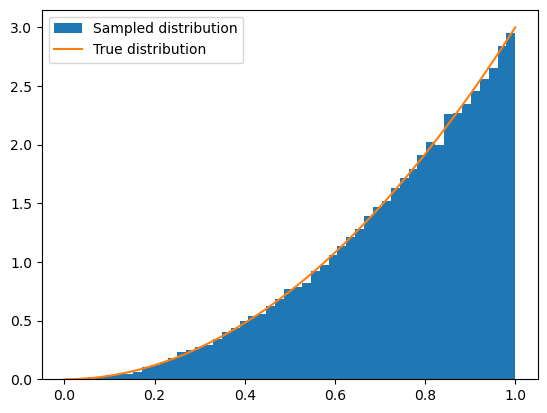

In [36]:
# collect 50_000 samples
num_samples = 50_000
results = np.array([sampleAngle(prn) for prn in np.random.rand(num_samples)])

def quadratic_pdf(x):
    return 3 * x * x

plot_distributions(results, quadratic_pdf)


In [37]:
# Determine the mean, standard deviation and standard error of the mean of your sampled results
mean_angle = np.mean(results)
std_dev_angle = np.std(results)
std_err_angle = std_dev_angle/np.sqrt(len(results))
print(f'The mean of the angle cosine it {mean_angle:.4g} '
      f'with a standard deviation of {std_dev_angle:.4g} '
      f'and a standard error of {std_err_angle:.4g}')

The mean of the angle cosine it 0.7492 with a standard deviation of 0.194 and a standard error of 0.0008678



### C. Sample the energy

- Write a function, sampleEnergyRatio, to sample the energy ratio given a uniform random variable.
- Plot a histogram with 50 bins from 50,000 samples found using your function (sampleEnergyRatio). ✅
- Determine the mean, standard deviation and standard error of this result.


In [38]:
def sampleEnergyRatio(prn):
    # defensive programming: 
    if (prn < 0 or prn >= 1):
        raise ValueError(f'Random number {prn} is outside the valid interval [0, 1)')

    return 1 - np.sqrt(prn) # <-- fill this in

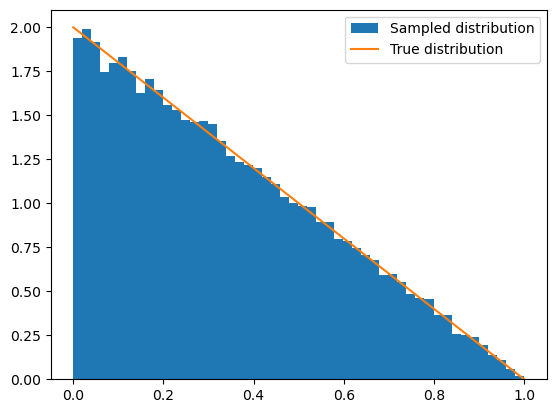

In [39]:
# collect 50_000 samples
num_samples = 50_000
results = np.array([sampleEnergyRatio(prn) for prn in np.random.rand(num_samples)])

def declining_linear_pdf(x):
    return 2 * (1-x)

plot_distributions(results, declining_linear_pdf)

In [40]:
# Determine the mean, standard deviation and standard error of the mean of your sampled results
mean_energy = np.mean(results)
std_dev_energy = np.std(results)
std_err_energy = std_dev_angle/np.sqrt(len(results))
print(f'The mean of the energy ratio is {mean_energy:.4g} '
      f'with a standard deviation of {std_dev_energy:.4g} '
      f'and a standard error of {std_err_energy:.4g}')

The mean of the energy ratio is 0.3339 with a standard deviation of 0.2356 and a standard error of 0.0008678



### D. Sample a collision

Consider a beam of particles traveling in the positive x direction with 5 MeV and having a collision at the origin. In the cells below, do the following:

- Create a list of the energy and direction of the first 5 particles after the collision.
- Determine and plot the location of these particles as they leave across a unit circle.

In [42]:
E0 = 5
n_particles = 5

for particle in range(n_particles):
    mu = sampleAngle(np.random.rand()) # <-- fill this in
    E = sampleEnergyRatio(np.random.rand()) * E0 # <-- fill this in

    x = mu # <-- fill this in
    y = np.sqrt(1 - mu*mu) # <-- fill this in

    print(f'Particle energy: {E:.2f} MeV, Particle crossing: x: {x:.4f}, y: {y:.4f}')

Particle energy: 1.53 MeV, Particle crossing: x: 0.6539, y: 0.7566
Particle energy: 2.84 MeV, Particle crossing: x: 0.8440, y: 0.5364
Particle energy: 0.39 MeV, Particle crossing: x: 0.9764, y: 0.2159
Particle energy: 1.13 MeV, Particle crossing: x: 0.6286, y: 0.7777
Particle energy: 0.28 MeV, Particle crossing: x: 0.8941, y: 0.4479
